# Лабораторная работа 2.2

In [2]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.optimize import curve_fit

In [3]:
def curve4(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

### Градуируем барабан монохроматора по спектру неона.

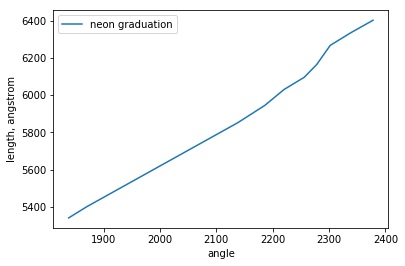

In [4]:
data = pd.read_csv('data/neon.csv', sep = ',', encoding = 'latin1')
x = data.angle
y = data.leng
plt.plot(x, y, label = 'neon graduation')

plt.xlabel('angle')
plt.ylabel('length, angstrom')
plt.legend(loc = 0)
plt.show()

### Градуировка по спектру ртути.

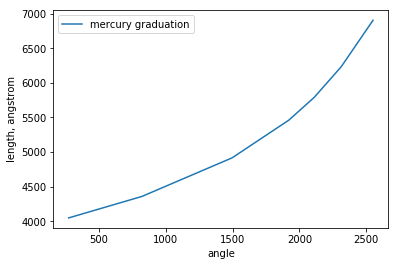

In [5]:
data = pd.read_csv('data/mercury.csv', sep = ',', encoding = 'latin1')
x = data.angle
y = data.leng
plt.plot(x, y, label = 'mercury graduation')

plt.xlabel('angle')
plt.ylabel('length, angstrom')
plt.legend(loc = 0)
plt.show()

### Объединим данные проведем градуировку.


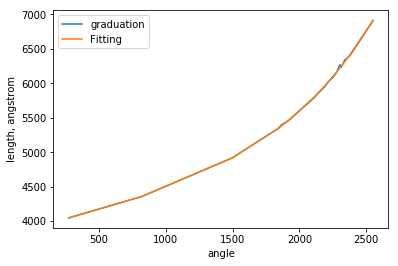

7.56003009752382e-11 *x^4+ -2.0857673107800724e-07 *x^3+ 0.00038290979035272615 *x^2+ 0.29168385845688627 *x+ 3941.9246391082447


In [9]:
data = pd.read_csv('data/summ.csv', sep = ',', encoding = 'latin1')
x = data.angle
y = data.leng
plt.plot(x, y, label = 'graduation')

res = curve_fit(f = curve4, xdata = x, ydata = y)
popt, pcov = res
plt.plot(x, curve4(x, *popt), label = 'Fitting')
a, b, c, d, e, = popt
plt.xlabel('angle')
plt.ylabel('length, angstrom')
plt.legend(loc = 0)
plt.show()

print(a,"*x^4+", b,"*x^3+", c,"*x^2+", d,"*x+", e)

### Определим длины волн линий  водорода:

In [39]:
H_alfa = a * 2440**4 + b * 2440**3 + c * 2440**2 + d * 2440 + e
H_beta = a * 1438**4 + b * 1438**3 + c * 1438**2 + d * 1438 + e
H_gamma = a * 800**4 + b * 800**3 + c * 800**2 + d * 800 + e
H_delta = a * 378**4 + b * 378**3 + c * 378**2 + d * 378 + e
print("H_alfa = {:.1f} (6563)".format(H_alfa))
print("H_beta = ", H_beta, " (4861)")
print("H_gamma = ", H_gamma, " (4341)")
print("H_delta = ", H_delta, " (4102)")

H_alfa = 6583.1 (6563)
H_beta =  4856.21366891  (4861)
H_gamma =  4344.50858867  (4341)
H_delta =  4097.1710026  (4102)


### Проверим сериальную закономерность: $\frac{1}{\lambda} = R \cdot (\frac{1}{n^{'2}} - \frac{1}{n^{2}})$
### Для серии Бальмера $n^{'} = 2$.

In [24]:
R = np.zeros(4)
R[0] = 1 / (H_alfa * ((1 / 4) - (1 / 9))) * 10**8
R[1] = 1 / (H_beta  * ((1 / 4) - (1 / 16))) * 10**8
R[2] = 1 / (H_gamma * ((1 / 4) - (1 / 25))) * 10**8 
R[3] = 1 / (H_delta * ((1 / 4) - (1 / 36))) * 10**8
print(R)

[ 109371.70912636  109824.93145788  109607.44269965  109831.88148964]


In [29]:
R_ex = (R[0] + R[1] + R[2] + R[3]) / 4
delta = ((R_ex - R[0])**2 + (R_ex - R[1])**2 + (R_ex - R[2])**2 + (R_ex - R[3])**2) ** 0.5
print(R_ex,"+-", delta, " (109737.3157 cm^{-1})")

109658.991193 +- 377.644620189  (109737.3157 cm^{-1})


### Измеренные длины волн соответствуют формуле сериальной зависимости. 
$R_{ex} = 109658.991193 \pm 377.644620189 см^{-1}$

$R_{tabl} = 109737.3157 см^{-1}$

## Определим длины волн линий поглощения йода.

In [31]:
H10 = a * 2264**4 + b * 2264**3 + c * 2264**2 + d * 2264 + e 
H15 = a * 2158**4 + b * 2158**3 + c * 2158**2 + d * 2158 + e 
Hgr = a * 1688**4 + b * 1688**3 + c * 1688**2 + d * 1688 + e 
print(H10, H15, Hgr)

6130.76012567 5898.0034779 5135.91952341


In [34]:
cc = 3 * 10**8 
h = 6.63 * 10**(-34)
Eh10 = h * cc / H10 * 10**10 / (1.6 * 10**(-19))
Eh15 = h * cc / H15 * 10**10 / (1.6 * 10**(-19))
Ehgr = h * cc / Hgr * 10**10 / (1.6 * 10**(-19))
print(Eh10, Eh15, Ehgr)

2.02768494366 2.10770475918 2.42045264598


In [40]:
h_nu2 = (Eh15 - Eh10) / 5
print("h_nu2 = ", h_nu2)
D1 = Ehgr - 0.94
h_nu_el = Ehgr - 0.69
D2 = Ehgr - h_nu_el
print(h_nu_el, D1, D2)

h_nu2 =  0.0160039631033
1.73045264598 1.48045264598 0.69
